> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset -  No Show Appointment Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
This data consists of about 100k medical appointments in Brazil, and the purpose is to answer the question of whether patients will attend or not there appointmens. A number of characteristics about the patient are included in each row.

●‘ScheduledDay’ tells us on
what day the patient set up their
appointment.

●‘Neighborhood’ indicates the
location of the hospital.

●‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.

●the last column ‘No-Show’: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up.

### Question(s) for Analysis :

#### What are the factors influencing whether or not patients will attend their medical appointments?

In [61]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
% matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [270]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [62]:
# Loadind the data 
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [63]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [64]:
df.shape

(110527, 14)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [66]:
df.isnull().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

there is no missing in the data

In [67]:
df.duplicated().sum()

0

No duplicates in the data

In [68]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [69]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


     ● Mean Age is approximately 37 years.
     ● Max Age is 115 years.   
     ● Min age appears negative, which means that there is an entry mistake.


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [70]:
#removing the columns that we will not need in our analysis
df.drop(['AppointmentID', 'PatientId', 'ScheduledDay'], axis=1, inplace=True)

In [71]:
df[df.Age == -1.000000]

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,F,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [72]:
#removing the row with the wrong entry of Age 
df.drop(index=99832, axis=0, inplace=True)

In [73]:
#converting AppointmentDay from string to datetime 
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df.AppointmentDay.dtype

dtype('<M8[ns]')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 11 columns):
Gender            110526 non-null object
AppointmentDay    110526 non-null datetime64[ns]
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hipertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handcap           110526 non-null int64
SMS_received      110526 non-null int64
No-show           110526 non-null object
dtypes: datetime64[ns](1), int64(7), object(3)
memory usage: 10.1+ MB


In [75]:
#renaming AppointmentDay , Hipertension, No-show columns to make analysis easy 
df.rename(columns={'AppointmentDay': 'Appointment_day','Hipertension': 'Hypertension', 'No-show': 'No_show'}, inplace=True)

In [76]:
df.columns

Index(['Gender', 'Appointment_day', 'Age', 'Neighbourhood', 'Scholarship',
       'Hypertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received',
       'No_show'],
      dtype='object')

In [77]:
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Exploring data generally


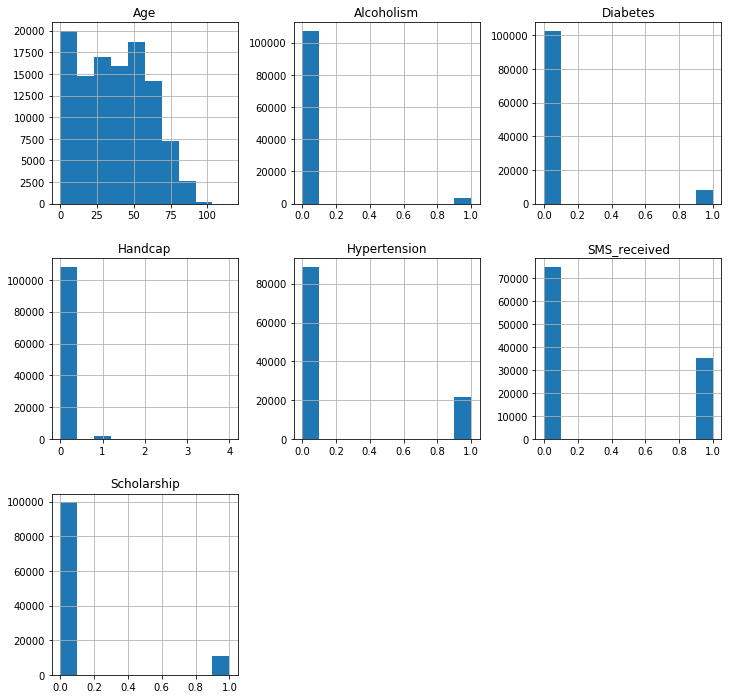

In [78]:
df.hist(figsize=(12,12));

    ●Most of Patients in this data:
      don't suffer from diabetes. 
      don't drink alcohol. 
      don't suffer from handcaps.
    
    ●About 20% of patients suffer from Hypertension.
    ●About 10% of patients don't have scholarship.
    ●Almost Half the patients recieved SMS.

In [79]:
df.No_show.value_counts()

No     88207
Yes    22319
Name: No_show, dtype: int64

Number of patients who didn't showed is approximately 1/4 of people who showed 

In [80]:
#create mask for the show patients
show = df.No_show == "No"

In [81]:
#create mast for noshow patinets
nshow = df.No_show == 'Yes'

### Does age affect patients attendance to their appointmens ?

In [82]:
#mean age of patients who showed
df.Age[show].mean()

37.790504154999034

In [83]:
#mean age og patients who didnt show
df.Age[nshow].mean()

34.317666562121957

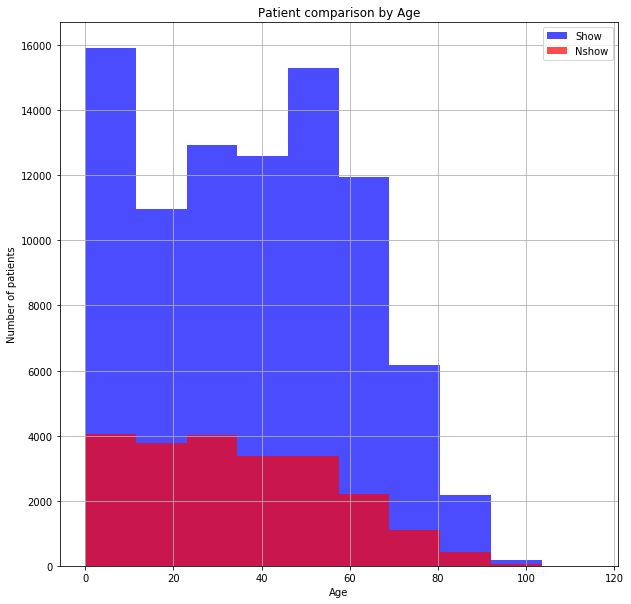

In [84]:
#comparison by age about Patients who showed to patients who didn't 
def showing(column_name):
    plt.figure(figsize=[10,10])
    df[column_name][show].hist(alpha=0.7, label='Show', bins=10, color='blue')
    df[column_name][nshow].hist(alpha=0.7, label='Nshow', bins=10, color='red');
    plt.title('Patient comparison by {}'.format(column_name));
    plt.xlabel(column_name);
    plt.ylabel('Number of patients');
    plt.legend();
showing('Age')

    ● Ages from 0 to 10 years old is the most patients who showed followed by ages from 30 to 60 
    ● With age, going to the appointment decreases
    

### Age has corelation with appointment attendance

### Does SMS affects patients attendance to their appointmens ?

In [85]:
#Number of patients received SMS
df.SMS_received.value_counts()


0    75044
1    35482
Name: SMS_received, dtype: int64

patients who recieved sms is about 32% of total number of patients in the data 

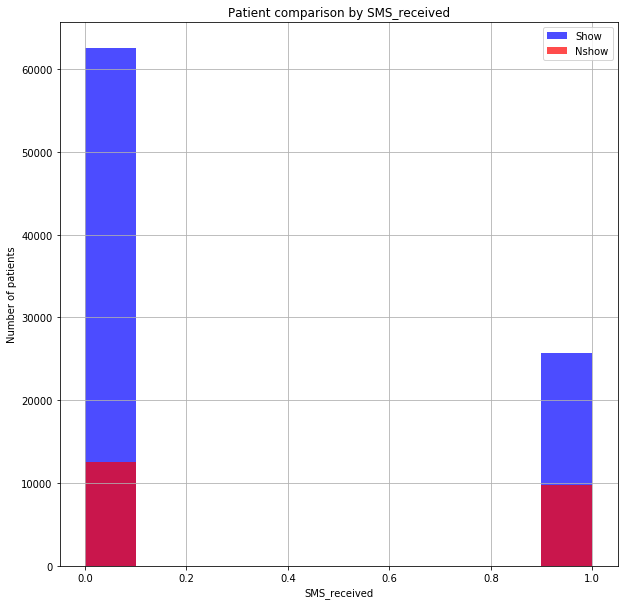

In [86]:
#comparison by SMS recieved about Patients who showed to patients who didn't 
showing('SMS_received')   

    ● Most people showed with out receiving SMS

In [87]:
df.groupby('No_show')['SMS_received'].value_counts()

No_show  SMS_received
No       0               62509
         1               25698
Yes      0               12535
         1                9784
Name: SMS_received, dtype: int64

    ● Number of patients who showed and recieved sms is about 72.5% of the number of patients who received sms 
    ● Number of patients who  showed but didnt recieve sms is about 83% of the number of patients who didnt received sms 


In [88]:
#counting the mean of sms recieved of people who showed and who didnt
df.groupby('No_show')['SMS_received'].mean()

No_show
No     0.291337
Yes    0.438371
Name: SMS_received, dtype: float64

### notice The attendance rate of the message recievers is less than the attendance rate without receiving the message!

### Does Gender affect patients attendance to their appointmens ?

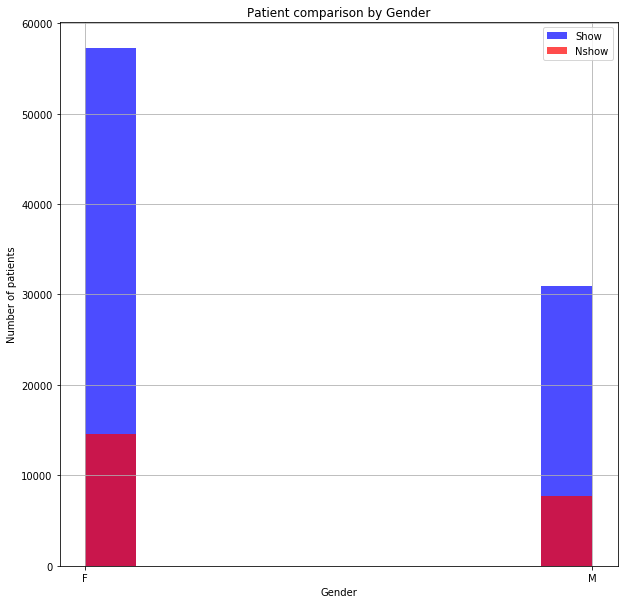

In [89]:
#comparison by Gender about Patients who showed to patients who didn't 
showing('Gender')

    ●Number of females is greater than number of males in this data 
    ●Number of females who didnt show is approximately 1/4 of the total number of females
    ●Number of males who didnt show is approximately 1/4 of total number of males  


In [90]:
df.Gender.value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

    ●Number of females is about 65% of total number of patients in this data.
    ●Number of males is aprroximately 35% of total number of patients in this data.

In [91]:
df.groupby('No_show')['Gender'].value_counts()

No_show  Gender
No       F         57245
         M         30962
Yes      F         14594
         M          7725
Name: Gender, dtype: int64

    ●about 19% of males  didn't show.
    ●about 20% of females didn't show.


### Gender is insignificant 
 there is no correlation between patients attendance and their gender 

### Does Neighbourhood affect patients attendance to their appointmens ?

In [92]:
#total number of nieghbourhoods in data 
df.Neighbourhood.nunique()

81

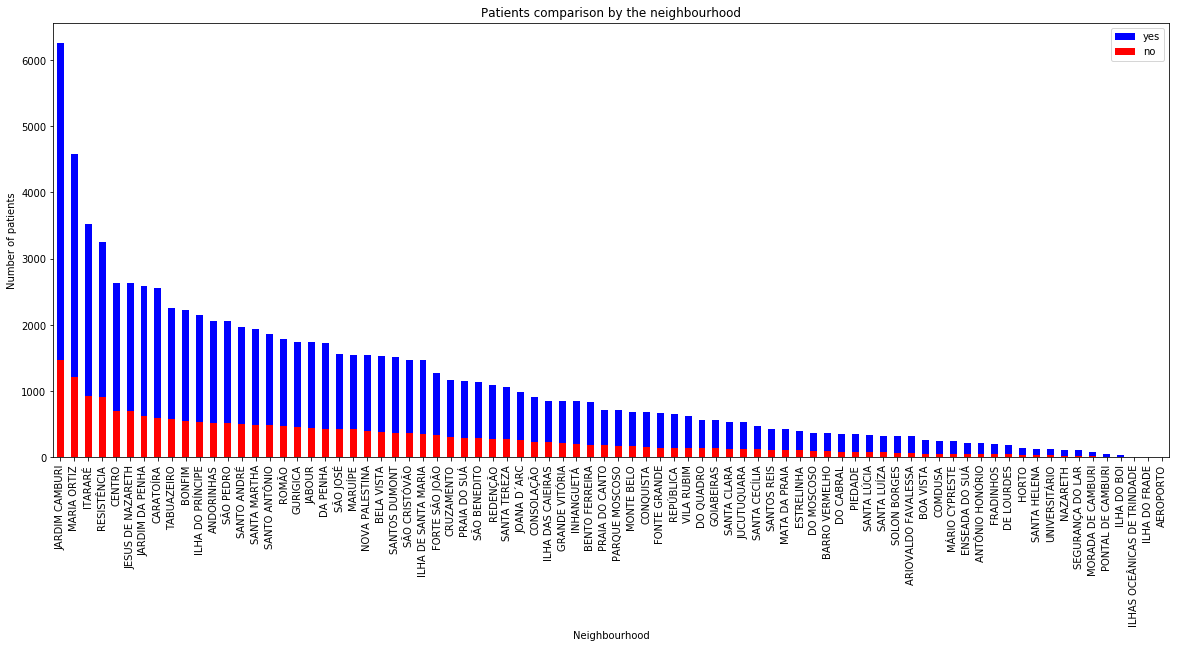

In [93]:
#comparison by neighbourhood recieved about Patients who showed to patients who didn't 

plt.figure(figsize=[20,8])
df.Neighbourhood[show].value_counts().plot(kind='bar', color='blue', label='yes')
df.Neighbourhood[nshow].value_counts().plot(kind='bar', color='red', label='no')
plt.legend();
plt.xlabel('Neighbourhood')
plt.ylabel('Number of patients')
plt.title('Patients comparison by the neighbourhood');

The most people showed was in jardim camburi 

In [94]:
#counts of jardim camburi in the data 
df[df.Neighbourhood == 'JARDIM CAMBURI'].Neighbourhood.value_counts()

JARDIM CAMBURI    7717
Name: Neighbourhood, dtype: int64

### Does scholarship affect patients attendance to their appointmens ?

In [95]:
df.Scholarship.value_counts()

0    99665
1    10861
Name: Scholarship, dtype: int64

●Patients who have sholarships is approxemately 10% of total number of patients

In [96]:
#counting mean of scholarships to people who showed and who didnt
df.groupby('No_show')['Scholarship'].mean()


No_show
No     0.093904
Yes    0.115507
Name: Scholarship, dtype: float64

In [97]:
df.groupby('No_show')['Scholarship'].value_counts()


No_show  Scholarship
No       0              79924
         1               8283
Yes      0              19741
         1               2578
Name: Scholarship, dtype: int64

    ● about 76% of patietns who has sholarship showed 
    ● about 80% of patients who dont have scholarship showed 

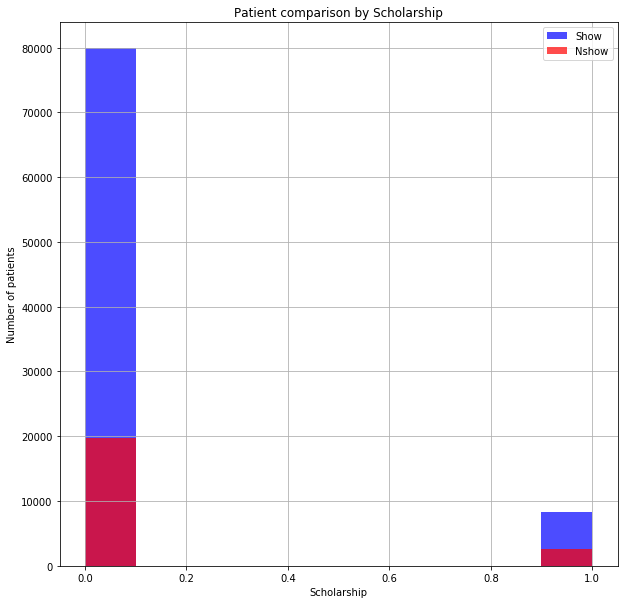

In [98]:
#comparison by Scholarship about Patients who showed to patients who didn't 
showing('Scholarship')

### ●there is no strong corelation between sholarship and appointments attendance 

### Does Alcohol affect patients attendance to their appointmens ?

In [99]:
df.groupby('No_show')['Alcoholism'].value_counts()

No_show  Alcoholism
No       0             85524
         1              2683
Yes      0             21642
         1               677
Name: Alcoholism, dtype: int64

●about 97% of patients doesnt drink alcohol 

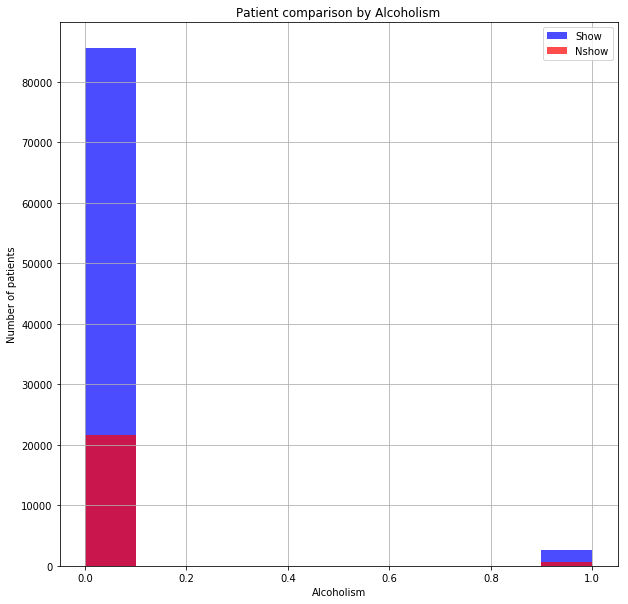

In [100]:
#comparison by Alcoholism about Patients who showed to patients who didn't 
showing('Alcoholism')

    ●about 80% of patietns who doesnt drink show 
    ●about 80% of patients who drink  show

### alcohol is insignificant

### Does chronic diseases affect patients attendance to their appointmens ?

In [101]:
#counting mean of show and no show patients who has hypertension 
df.groupby('No_show')['Hypertension'].mean()

No_show
No     0.204394
Yes    0.169004
Name: Hypertension, dtype: float64

In [102]:
df.groupby('No_show')['Hypertension'].value_counts()

No_show  Hypertension
No       0               70178
         1               18029
Yes      0               18547
         1                3772
Name: Hypertension, dtype: int64

    ●about 80% of patients who doesnt suffer hypertension showed
    ●about 82% of patinets who suffer hypertension showed 

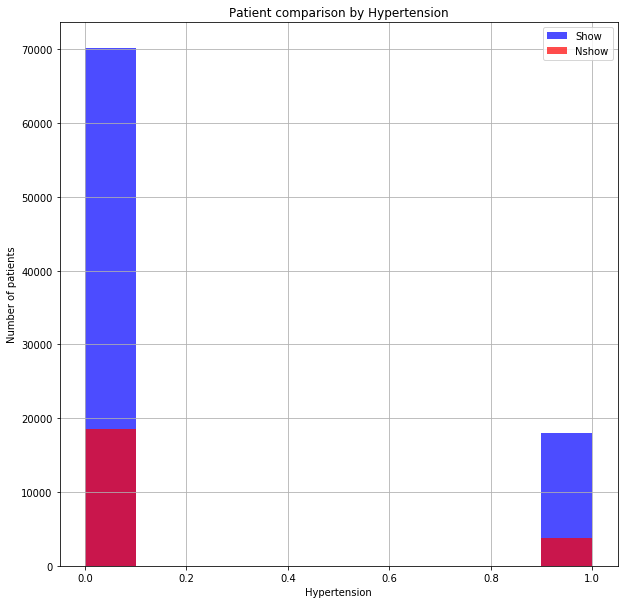

In [120]:
#comparison by Hypertension about Patients who showed to patients who didn't 
showing('Hypertension')

### Hypertension is insignificant 

In [104]:
#counting mean of show and noshow patietns who has diabetes 
df.groupby('No_show')['Diabetes'].mean()

No_show
No     0.073838
Yes    0.064071
Name: Diabetes, dtype: float64

In [105]:
df.groupby('No_show')['Diabetes'].value_counts()

No_show  Diabetes
No       0           81694
         1            6513
Yes      0           20889
         1            1430
Name: Diabetes, dtype: int64

    ●about 79% of patients who doesnt suffer from diabetes showed 
    ●about 81% of patients who suffer from diabetes has showe

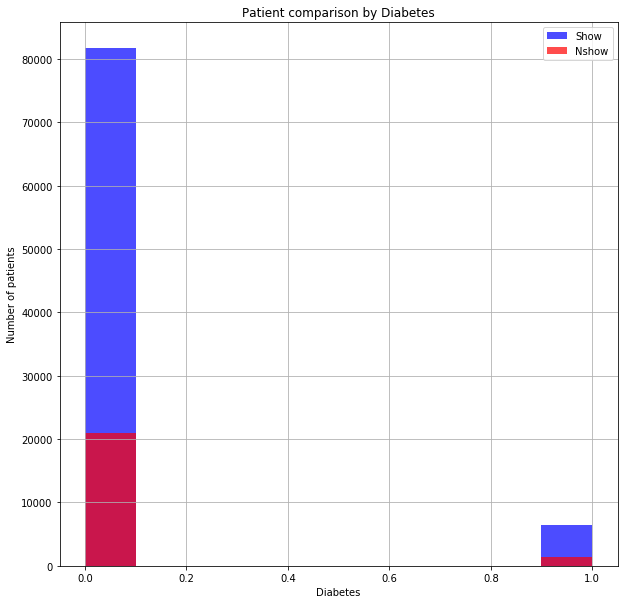

In [106]:
#comparison by diabetes about Patients who showed to patients who didn't 
showing('Diabetes')

### Diabetes is insignificant

### Does Handicap affect patients attendance to their appointmens ?

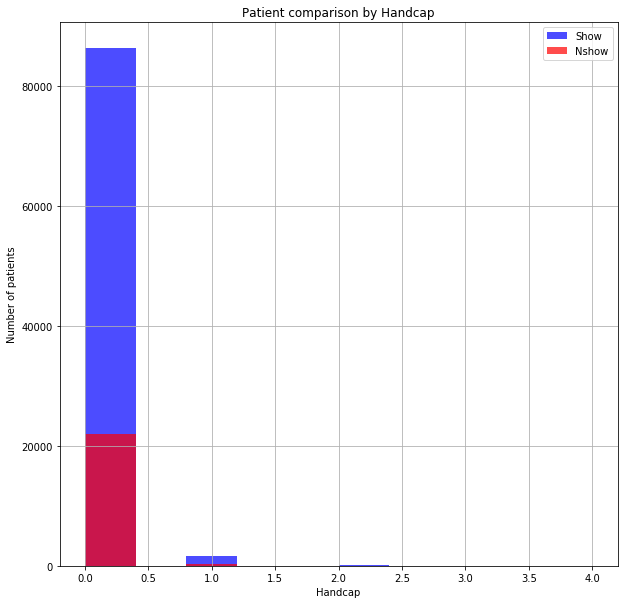

In [107]:
showing('Handcap')

### Handcap is insignificant 

### Does appointment date affect patients attendance to their appointmens ?

In [108]:
#creating month column 
Month = df.Appointment_day.dt.month_name()
df['Month']= Month

In [109]:
df['Month'].value_counts()

May      80841
June     26450
April     3235
Name: Month, dtype: int64

May is the highest rate in data 

In [110]:
df.groupby('No_show').Month.value_counts()

No_show  Month
No       May      64037
         June     21568
         April     2602
Yes      May      16804
         June      4882
         April      633
Name: Month, dtype: int64

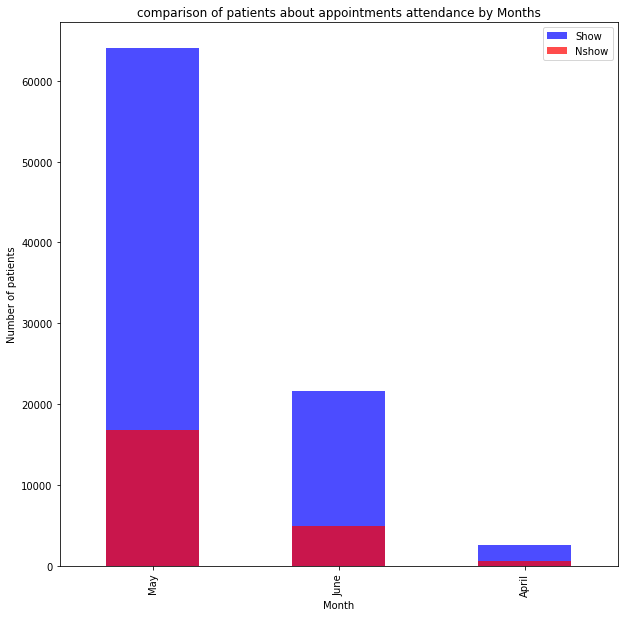

In [111]:
plt.figure(figsize=(10, 10))
df.Month[show].value_counts().plot(kind='bar', color='blue', alpha=.7, label='Show');
df.Month[nshow].value_counts().plot(kind='bar', color='red', alpha=.7, label='Nshow')
plt.xlabel('Month')
plt.ylabel('Number of patients')
plt.legend();
plt.title('comparison of patients about appointments attendance by Months');

In [112]:
Day = df.Appointment_day.dt.day_name()

In [113]:
df['Day'] = Day

In [114]:
df.Day.value_counts()

Wednesday    25867
Tuesday      25640
Monday       22714
Friday       19019
Thursday     17247
Saturday        39
Name: Day, dtype: int64

wendes day is the highet rate in data

In [115]:
df.groupby('No_show').Day.value_counts()

No_show  Day      
No       Wednesday    20774
         Tuesday      20488
         Monday       18024
         Friday       14982
         Thursday     13909
         Saturday        30
Yes      Tuesday       5152
         Wednesday     5093
         Monday        4690
         Friday        4037
         Thursday      3338
         Saturday         9
Name: Day, dtype: int64

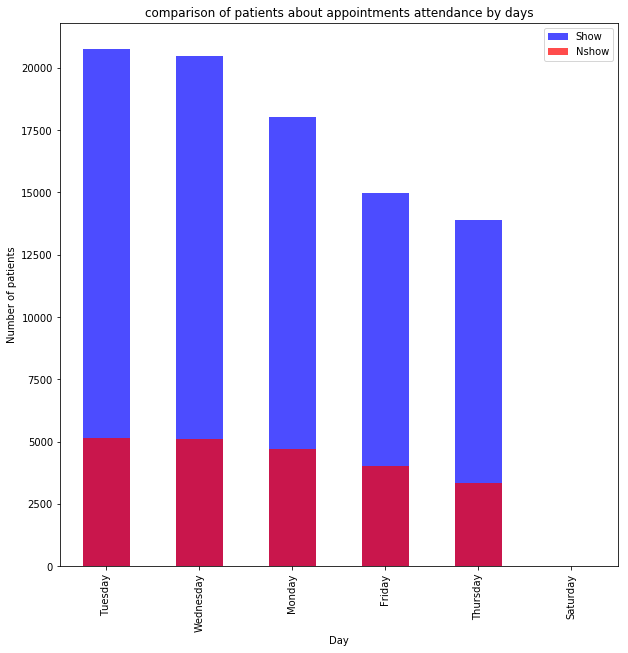

In [116]:
plt.figure(figsize=(10, 10))
df.Day[show].value_counts().plot(kind='bar', color='blue', alpha=.7, label='Show');
df.Day[nshow].value_counts().plot(kind='bar', color='red', alpha=.7, label='Nshow')
plt.xlabel('Day')
plt.ylabel('Number of patients')
plt.legend();
plt.title('comparison of patients about appointments attendance by days');


### Date(Day and month ) is insignificat 

### is there a correlation between age and chronic diseases that affects  patients attendance to their appointmens ?

In [117]:
df.groupby(['No_show', 'Hypertension', 'Diabetes'])['Age'].mean()

No_show  Hypertension  Diabetes
No       0             0           31.510433
                       1           53.666952
         1             0           59.702144
                       1           63.406361
Yes      0             0           28.834155
                       1           49.183391
         1             0           58.377043
                       1           62.820333
Name: Age, dtype: float64

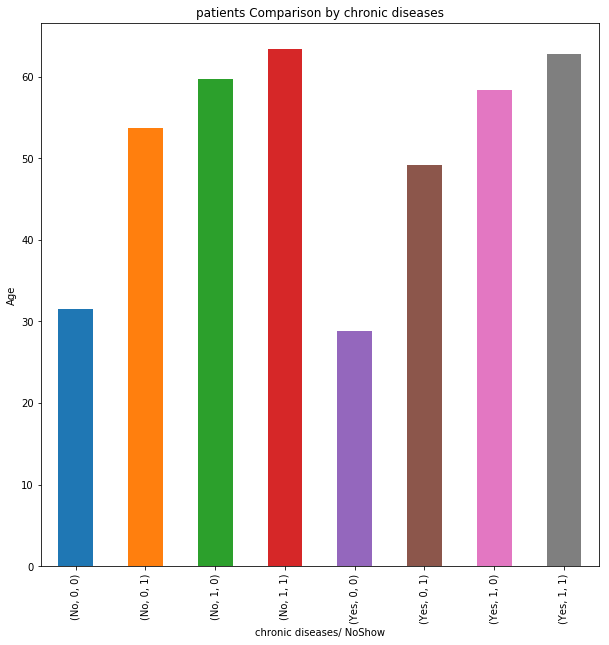

In [118]:
plt.figure(figsize=(10, 10))
df.groupby(['No_show', 'Hypertension', 'Diabetes'])['Age'].mean().plot(kind='bar');
plt.xlabel('chronic diseases/ NoShow')
plt.ylabel('Age')
plt.title('patients Comparison by chronic diseases');


     there is a positive correlation between age and chronic diseases
     No correlation between age and chronic diseases affect the appointments attendance

# conclusions

    1- The relationship between age and appointment attendance appears as Ages from 0 to 10 years old is the most patients          who showed followed by ages from 30 to 60.
    2- Neighbourhood is highly correlated with clinic attendance.
    3- The attendance rate of the message recievers is less than the attendance without receiving the message which sounds          unnatural.

### limitations :   
couldn't found correlations between patients showing and many charactries such as gender, chronic diseases, handcaps and  alcohol.  

In [119]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0